# **Experiment 10 (Final)**

## **Name: Fahim Shahriar**
### Github: https://github.com/FahimS45

### Dataset description: https://archive.ics.uci.edu/dataset/2/adult
### Dataset link: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset 

Through our last 9 experiments, we have selected five best model that achieved superior performance
- **LightGBM**
- **XGBoost**
- **Gradient Boosting**
- **Random Forest**
- **Ada Boost**

In this final experiment, we will try to achieve optimal performance from all these models using all possible preprocessing and feature engineering techniques.

In [602]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from imblearn.combine import SMOTETomek

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score


# Ensure matplotlib inline plotting for Jupyter Notebooks
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [603]:
# Load the dataset
data = pd.read_csv('adult.csv', na_values="?", skipinitialspace=True)

In [604]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [605]:
data.tail(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48832,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
48833,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
48834,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
48836,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [606]:
data.shape

(48842, 15)

In [607]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [608]:
data.nunique()

age                   74
workclass              8
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            14
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        41
income                 2
dtype: int64

In [609]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [610]:
def null_percentage (df):

    df_len = df.shape[0]
    columns = df.columns
    total_null_count = 0

    for each in columns:
        null_count = df[each].isnull().sum()
        if null_count != 0.0:
            null_per = (df[each].isnull().sum() / df_len) * 100
            print(f'Null value percentage in {each} is : {null_per: .2f}')
            total_null_count = total_null_count + null_count
            
    if total_null_count == 0:
        print(f'No null value exist.')

In [611]:
null_percentage(data)

Null value percentage in workclass is :  5.73
Null value percentage in occupation is :  5.75
Null value percentage in native-country is :  1.75


In [612]:
def cat_cols(df):

    categorical_cols = df.select_dtypes(include=['object']).columns
    total_cat_cols = len(categorical_cols)
    total_cols = df.shape[1]

    if total_cat_cols != 0: 
        print(f'Total categorical column {total_cat_cols} out of {total_cols} and they are as follows: ')

        for each in categorical_cols:
            print(each)

        for each in categorical_cols:
            unique_vals = df[each].unique()
            print(f'Feature {each} has {len(unique_vals)} unique values which are: {unique_vals}\n')

In [613]:
cat_cols(data)

Total categorical column 9 out of 15 and they are as follows: 
workclass
education
marital-status
occupation
relationship
race
gender
native-country
income
Feature workclass has 9 unique values which are: ['Private' 'Local-gov' nan 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Feature education has 16 unique values which are: ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']

Feature marital-status has 7 unique values which are: ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

Feature occupation has 15 unique values which are: ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' nan
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed

### **Apply Label encoding for visualization**

In [614]:
df_vis = data.copy()

label_encoder = LabelEncoder()

# Function to apply label encoding ignoring missing values
def label_encode_column(column):

    placeholder = 'missing'
    temp_col = column.fillna(placeholder)
    
    encoded_col = label_encoder.fit_transform(temp_col)
    
    encoded_col = pd.Series(encoded_col, index=column.index)
    encoded_col[column.isna()] = np.nan
    
    return encoded_col

for column in df.columns:
    df_vis[column] = label_encode_column(df_vis[column])

df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### **Data Visualization**

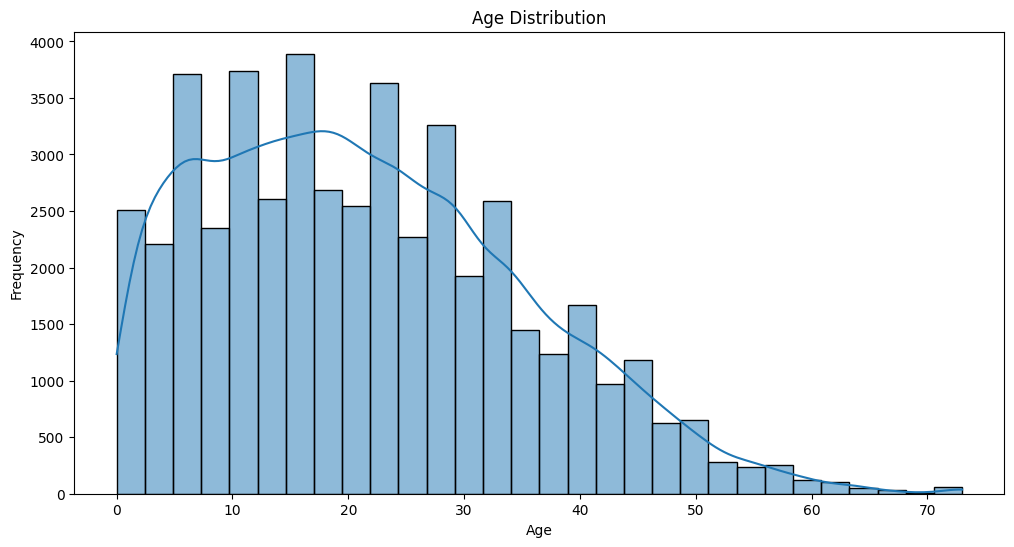

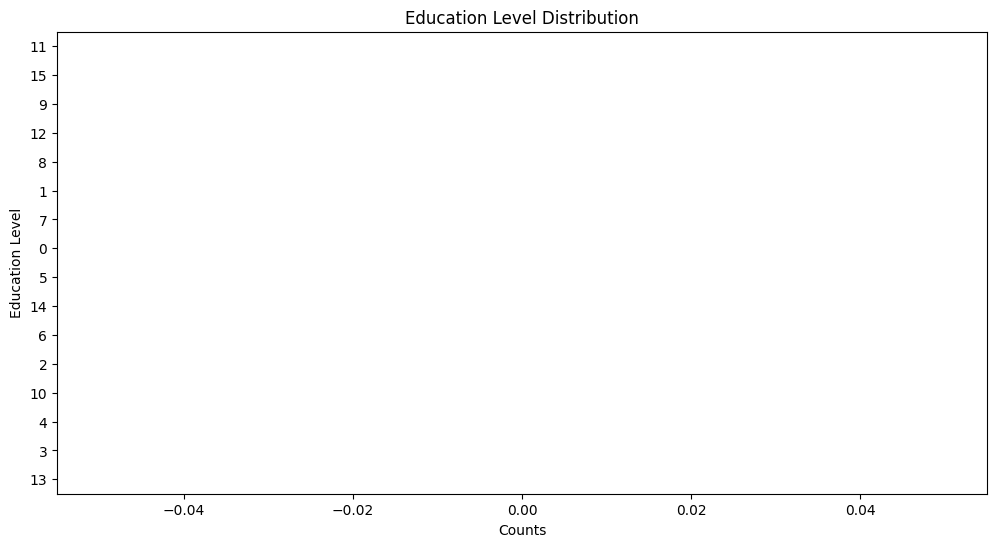

In [615]:
# Histogram for age
plt.figure(figsize=(12, 6))
sns.histplot(df_vis['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar chart for education level
plt.figure(figsize=(12, 6))
sns.countplot(y='education', data=df, order = df_vis['education'].value_counts().index)
plt.title('Education Level Distribution')
plt.xlabel('Counts')
plt.ylabel('Education Level')
plt.show()


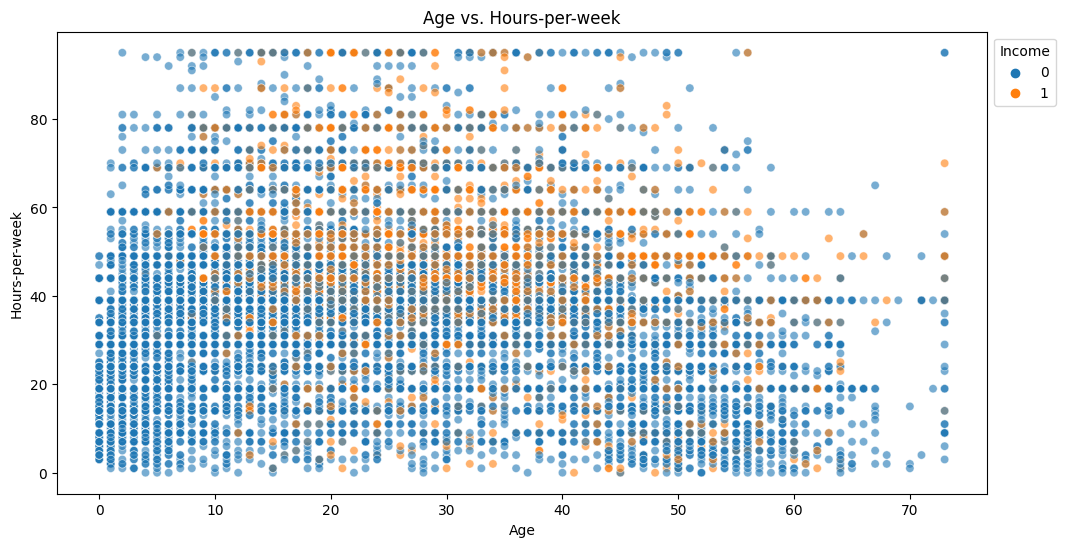

In [616]:
# Scatter plot for age vs hours-per-week
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='hours-per-week', data=df_vis, hue='income', alpha=0.6)

# Customize the legend
plt.legend(title='Income', loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Age vs. Hours-per-week')
plt.xlabel('Age')
plt.ylabel('Hours-per-week')
plt.show()

<Figure size 1200x600 with 0 Axes>

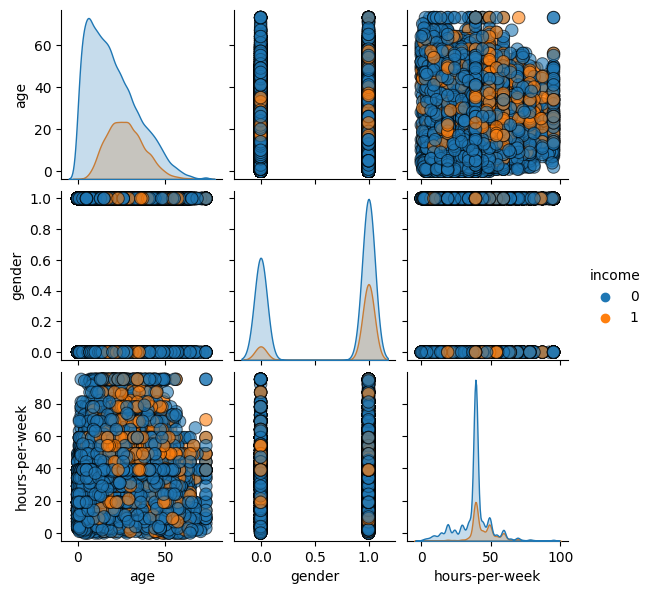

In [617]:
# Pairwise plot -> multi-variate
# Selecting a subset of features for clarity
subset_data = df_vis[['age', 'gender', 'hours-per-week', 'income']]

# Pair plot
plt.figure(figsize=(12, 6))
sns.pairplot(subset_data, hue='income', diag_kind='kde', plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'}, size=2)
plt.show()


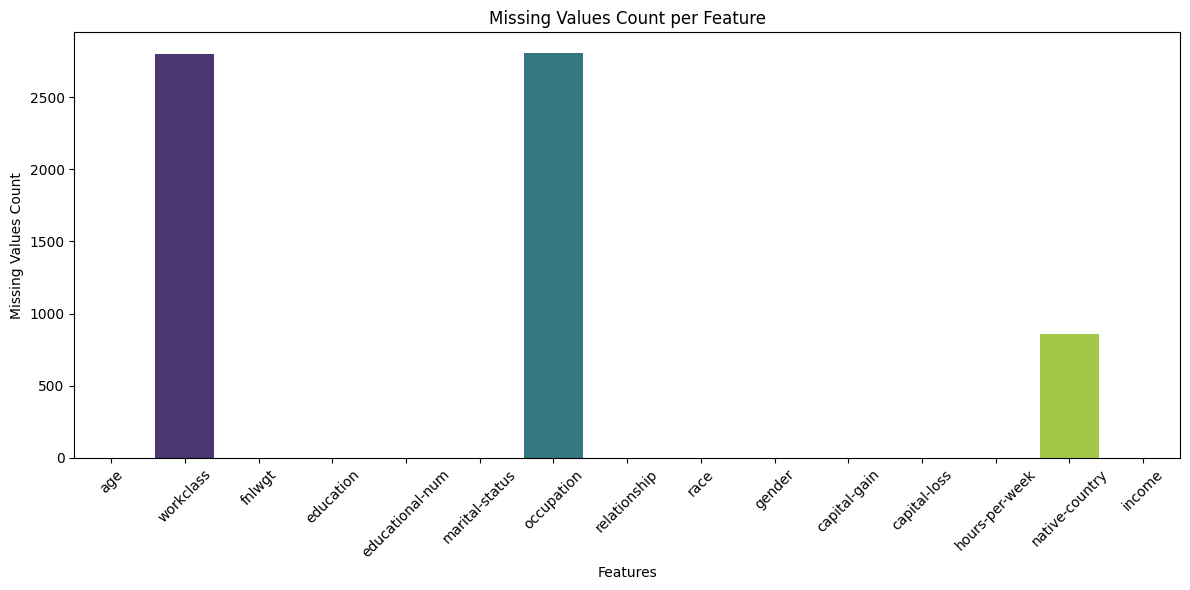

In [618]:
# Visualize null values in bar plot
def null_values_bar_plot(df):

    missing_values = df.isnull().sum()
    plt.figure(figsize=(12, 6))

    ax = sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")

    # Customize the plot
    plt.xlabel('Features')
    plt.ylabel('Missing Values Count')
    plt.title('Missing Values Count per Feature')

    # Angle the x-axis tick labels
    plt.xticks(rotation=45)  # Rotate labels to 45 degrees for better readability

    # Show the plot
    plt.tight_layout()
    plt.show()

null_values_bar_plot(df_vis)


### **Train Test Split**

In [619]:
df = data.copy()
X = df.iloc[:, 0:14]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (34189, 14)
Shape of X_test: (14653, 14)
Shape of y_train: (34189,)
Shape of y_test: (14653,)


In [620]:
X_train.sample(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
19078,26,Private,34402,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,45,United-States
10127,55,Private,204334,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,55,England
1785,26,Federal-gov,337575,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States
29040,43,Self-emp-not-inc,315971,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
19015,32,Private,94235,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
27478,48,Private,180446,10th,6,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40,United-States
46179,53,Private,152657,10th,6,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States
35581,32,Private,116677,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
2732,59,State-gov,136819,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,8,United-States
44236,34,Private,366898,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Germany


### **Encoding Categorical columns**

Ordinal encoding

In [642]:
from sklearn.preprocessing import OrdinalEncoder

In [643]:
binary_col = ['gender']
ordinal_cols = ['education']

ordinal_cols_categories = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
binary_col_categories = ['Male', 'Female']

In [644]:
ordinal_encoder = OrdinalEncoder(categories=[ordinal_cols_categories])
gender_encoder = OrdinalEncoder(categories=[binary_col_categories])

Imputing missing values with mode for categorical columns

In [645]:
# Imputation with median
imputer = SimpleImputer(strategy='most_frequent')

In [646]:
null_percentage(X_train)

Null value percentage in workclass is :  5.72
Null value percentage in occupation is :  5.74
Null value percentage in native-country is :  1.76


In [647]:
transformer = ColumnTransformer(transformers=[
    ('tnf1', imputer, ['workclass', 'occupation', 'native-country']),
    ('tnf2', ordinal_encoder, ordinal_cols),
    ('tnf3', gender_encoder, binary_col)
],remainder='passthrough')

In [648]:
X_train_trf = transformer.fit_transform(X_train)
X_test_trf = transformer.transform(X_test)

In [649]:
# Reordering columns
column_names = ['workclass', 'occupation', 'native-country', 
                'education', 'gender', 'age', 'fnlwgt', 'educational-num',
                'marital-status', 'relationship', 'race','capital-gain', 
                'capital-loss', 'hours-per-week']

X_train_trf = pd.DataFrame(X_train_trf, columns=column_names)
X_test_trf = pd.DataFrame(X_test_trf, columns=column_names)

In [650]:
X_train_trf.sample(10)

,workclass,occupation,native-country,education,gender,age,fnlwgt,educational-num,marital-status,relationship,race,capital-gain,capital-loss,hours-per-week
17949,Self-emp-not-inc,Sales,United-States,9.0,1.0,36,36425,10,Divorced,Unmarried,White,0,0,35
422,Private,Adm-clerical,United-States,9.0,1.0,55,199212,10,Married-civ-spouse,Wife,White,5178,0,40
4,Private,Transport-moving,United-States,8.0,1.0,29,359155,9,Separated,Unmarried,White,0,0,30
7295,Private,Machine-op-inspct,United-States,8.0,1.0,54,174806,9,Married-civ-spouse,Wife,White,0,0,40
18664,Private,Adm-clerical,United-States,9.0,0.0,40,202922,10,Married-civ-spouse,Husband,White,0,0,40
6436,Private,Transport-moving,United-States,8.0,0.0,33,55699,9,Married-civ-spouse,Husband,White,3908,0,40
26086,Private,Transport-moving,United-States,8.0,0.0,90,90523,9,Widowed,Unmarried,White,0,0,99
11936,Private,Adm-clerical,United-States,9.0,1.0,22,247731,10,Never-married,Own-child,White,0,0,40
16976,Private,Craft-repair,United-States,8.0,0.0,31,101761,9,Married-civ-spouse,Husband,White,0,0,51
29409,Private,Prof-specialty,United-States,8.0,1.0,51,190678,9,Divorced,Unmarried,Black,0,0,40


In [651]:
X_test_trf.sample(10)

,workclass,occupation,native-country,education,gender,age,fnlwgt,educational-num,marital-status,relationship,race,capital-gain,capital-loss,hours-per-week
4757,Private,Sales,United-States,8.0,0.0,45,160440,9,Married-civ-spouse,Husband,White,0,0,55
6858,Self-emp-not-inc,Farming-fishing,Cambodia,8.0,0.0,42,303044,9,Married-civ-spouse,Husband,Asian-Pac-Islander,0,0,40
5377,Self-emp-not-inc,Farming-fishing,United-States,3.0,0.0,77,34761,4,Married-civ-spouse,Husband,White,0,0,40
1477,Private,Craft-repair,Germany,8.0,0.0,30,116508,9,Married-civ-spouse,Husband,White,0,0,40
10505,Private,Craft-repair,United-States,8.0,0.0,47,119939,9,Married-civ-spouse,Husband,White,0,0,40
8497,Private,Transport-moving,United-States,4.0,0.0,59,43221,5,Married-civ-spouse,Husband,White,0,0,60
13048,Private,Other-service,United-States,8.0,0.0,26,330263,9,Separated,Not-in-family,White,0,0,40
3292,Federal-gov,Adm-clerical,United-States,9.0,0.0,61,136787,10,Married-civ-spouse,Husband,White,0,0,40
6795,Private,Craft-repair,United-States,12.0,0.0,35,125933,13,Married-civ-spouse,Husband,White,0,0,50
7247,Private,Machine-op-inspct,United-States,8.0,0.0,21,162688,9,Never-married,Own-child,White,0,0,40


Label encoding

In [652]:
label_encode = LabelEncoder()
y_train_trf = label_encode.fit_transform(y_train)
y_test_trf = label_encode.transform(y_test)

In [653]:
y_train_trf = pd.DataFrame(y_train_trf, columns=['income'])
y_test_trf = pd.DataFrame(y_test_trf, columns=['income'])

Kfold Target Encoding on the Nomical features

In [654]:
nominal_cate_cols = ['workclass', 'occupation', 'native-country', 'marital-status', 'relationship', 'race']

In [696]:
def kfold_target_encoding_to_train(X_train, y_train, categorical_cols, n_splits=5):

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    X_train_encoded = X_train.copy()
    encoding_map = {}
    
    global_mean = y_train.values.mean()

    for col in categorical_cols:

        for train_idx, val_idx in kf.split(X_train):
            X_train_fold, y_train_fold = X_train.iloc[train_idx], y_train.iloc[train_idx]
            X_val_fold = X_train.iloc[val_idx]
            y_train_fold = y_train.iloc[train_idx] 
            
            # Calculate target mean for each category in the training set
            target_means = y_train_fold.groupby(X_train_fold[col]).mean()
            
            # Remove 'income' key if exists
            target_means_dict = target_means.to_dict()
            t = target_means_dict.pop('income', None)
            
            category_freqs = X_train_fold[col].value_counts()
            
            # Smoothing parameters
            alpha = 1  # Strength of the smoothing (higher = more smoothing)
            smoothed_means = {k: (t[k] * category_freqs[k] + global_mean * alpha) / (category_freqs[k] + alpha)
                          for k in t}
            
            # Map the validation set categories to the smoothed means
            X_train_encoded.loc[val_idx, col] = X_val_fold[col].map(smoothed_means)
        
        # Fill NaNs with the global mean
        X_train_encoded[col].fillna(global_mean, inplace=True)

        encoding_map[col] = smoothed_means

    # Convert all the columns into numerical
    for col in X_train_encoded.columns:
        X_train_encoded[col] = pd.to_numeric(X_train_encoded[col])

    return X_train_encoded, encoding_map


def kfold_target_encoding_to_test(X_test, encoding_map):
    X_test_encoded = X_test.copy()

    for col, mean_values in encoding_map.items():
        # Map mean values to categories present in both training and testing sets
        X_test_encoded[col] = X_test[col].map(mean_values)

    # Convert all the columns into numerical
    for col in X_test_encoded.columns:
        X_test_encoded[col] = pd.to_numeric(X_test_encoded[col])
        
    return X_test_encoded

In [697]:
X_train_encoded, encode_map = kfold_target_encoding_to_train(X_train_trf, y_train_trf, nominal_cate_cols)
X_test_encoded = kfold_target_encoding_to_test(X_test_trf, encode_map)

### **Class Balancing using SMOTETomek**

New shape of X_train_encoded: (47138, 14)
New shape of y_train_trf: (47138,)


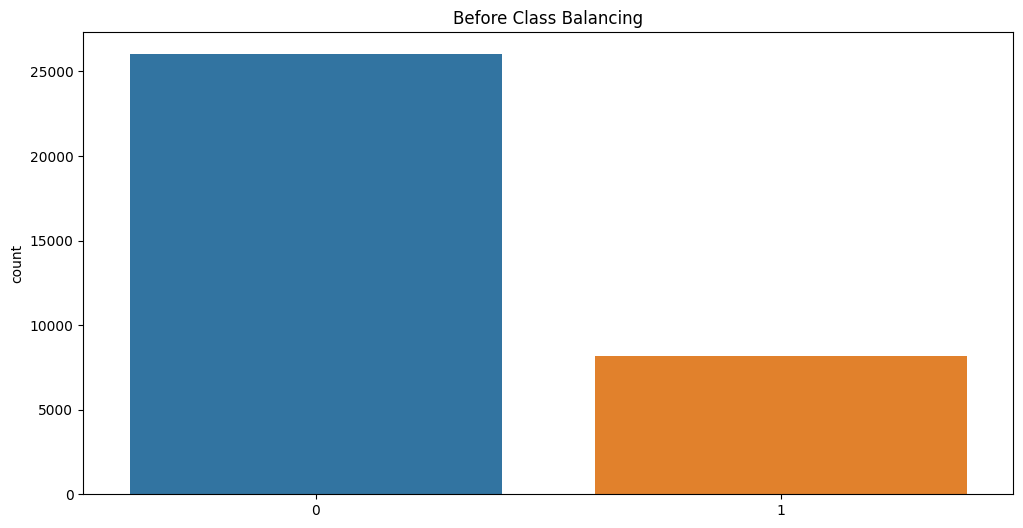

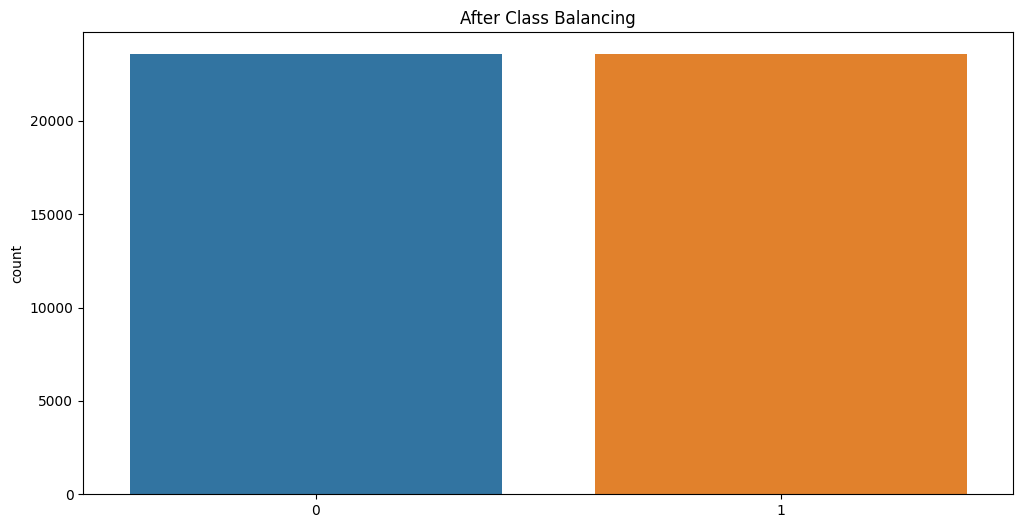

In [698]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(n_jobs=-1, random_state=42)
X_train_resampled, y_train_resampled = smote_tomek._fit_resample(X_train_encoded, y_train_trf)

print(f'New shape of X_train_encoded: {X_train_resampled.shape}')
print(f'New shape of y_train_trf: {y_train_resampled.shape}')

# Before class balancing
plt.figure(figsize= (12, 6))
plt.title('Before Class Balancing')
sns.countplot(x = y_train_trf.values.reshape(-1))

plt.figure(figsize = (12, 6))
plt.title('After Class Balancing')
sns.countplot(x = y_train_resampled)
plt.show()

### **Pipeline of top five Models with Ensemble learning**

In [712]:
from sklearn.ensemble import VotingClassifier

# Create an ensemble of all models
ensemble = VotingClassifier(estimators=[
    ('LightGBM', LGBMClassifier(verbose=0, random_state=42)),
    ('XGBoost', XGBClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)), 
    ('Ada Boosting', AdaBoostClassifier(random_state=42)), 
], voting='soft')

# Define pipelines for different models
pipelines = {
    'LightGBM': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LGBMClassifier(verbose=0, random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', XGBClassifier(random_state=42))
    ]),
    'GradientBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),  
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'AdaBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', AdaBoostClassifier(random_state=42))
    ]),
    'Ensemble Learning': Pipeline([
        ('scaler', StandardScaler()), 
        ('classifiers', ensemble)
    ])
}

In [713]:
from sklearn import set_config
set_config(display='diagram')
pipelines


{'LightGBM': Pipeline(steps=[('scaler', StandardScaler()),
                 ('classifier', LGBMClassifier(random_state=42, verbose=0))]),
 'XGBoost': Pipeline(steps=[('scaler', StandardScaler()),
                 ('classifier',
                  XGBClassifier(base_score=None, booster=None, callbacks=None,
                                colsample_bylevel=None, colsample_bynode=None,
                                colsample_bytree=None, device=None,
                                early_stopping_rounds=None,
                                enable_categorical=False, eval_metric=None,
                                feature_types=None, gamma=None, grow_policy=None,
                                importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
                                max_cat_to_onehot=None, max_delta_step=None,
                                max_depth=Non

LightGBM Accuracy: 0.87

LightGBM Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     11138
           1       0.78      0.64      0.70      3515

    accuracy                           0.87     14653
   macro avg       0.83      0.79      0.81     14653
weighted avg       0.86      0.87      0.86     14653



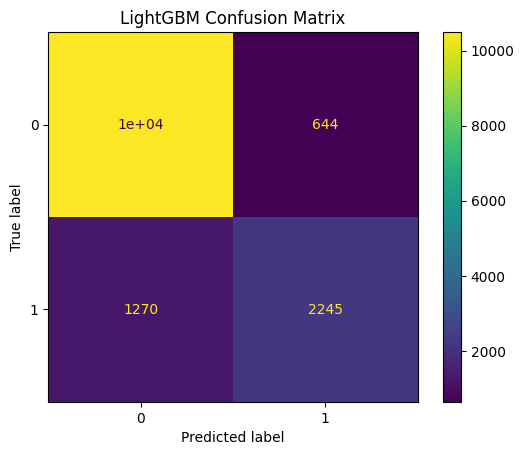

----------------------------------------------------------------------------
XGBoost Accuracy: 0.87

XGBoost Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11138
           1       0.78      0.65      0.71      3515

    accuracy                           0.87     14653
   macro avg       0.84      0.80      0.81     14653
weighted avg       0.87      0.87      0.87     14653



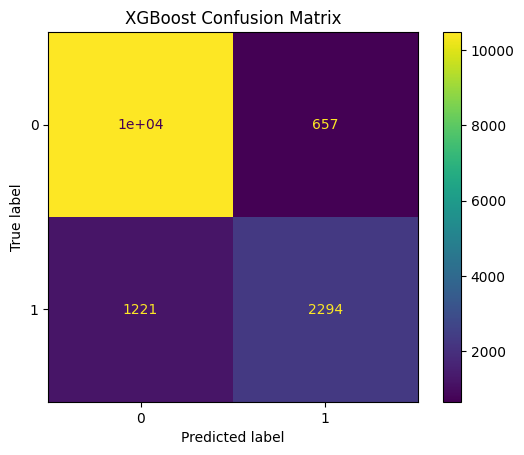

----------------------------------------------------------------------------
GradientBoost Accuracy: 0.86

GradientBoost Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     11138
           1       0.73      0.67      0.70      3515

    accuracy                           0.86     14653
   macro avg       0.81      0.79      0.80     14653
weighted avg       0.86      0.86      0.86     14653



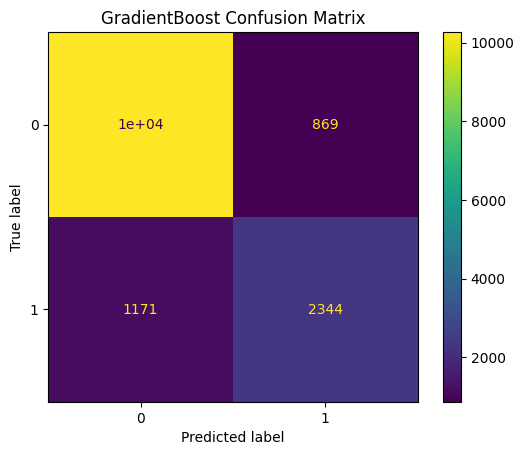

----------------------------------------------------------------------------
Random Forest Accuracy: 0.85

Random Forest Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     11138
           1       0.72      0.63      0.67      3515

    accuracy                           0.85     14653
   macro avg       0.80      0.77      0.79     14653
weighted avg       0.85      0.85      0.85     14653



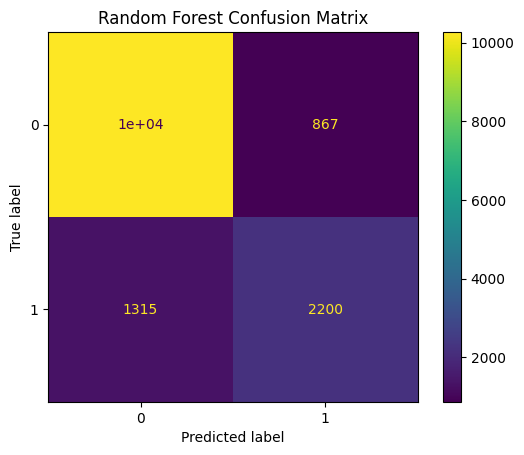

----------------------------------------------------------------------------
AdaBoost Accuracy: 0.85

AdaBoost Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     11138
           1       0.68      0.69      0.69      3515

    accuracy                           0.85     14653
   macro avg       0.79      0.79      0.79     14653
weighted avg       0.85      0.85      0.85     14653



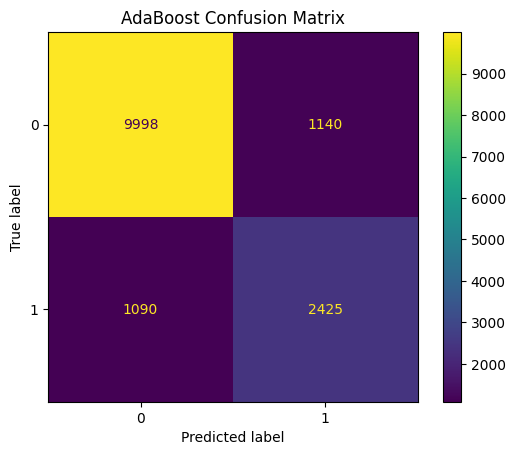

----------------------------------------------------------------------------
Ensemble Learning Accuracy: 0.87

Ensemble Learning Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11138
           1       0.77      0.65      0.71      3515

    accuracy                           0.87     14653
   macro avg       0.83      0.80      0.81     14653
weighted avg       0.86      0.87      0.87     14653



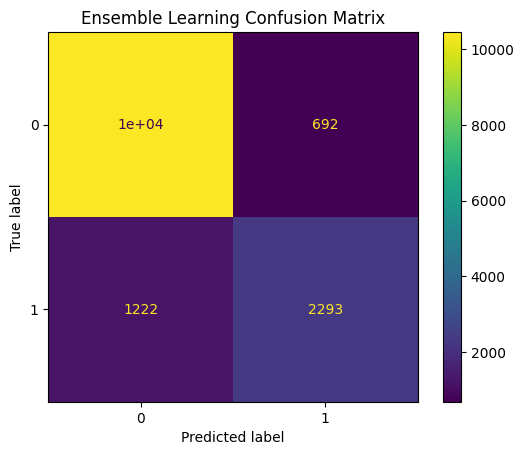

----------------------------------------------------------------------------


In [714]:
metrics = {
    'Accuracy': accuracy_score,
    'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred, average='weighted'),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred, average='weighted'),
    'F1 Score': lambda y_true, y_pred: f1_score(y_true, y_pred, average='weighted')
}

results = {metric: {} for metric in metrics}

# Train and evaluate each pipeline
for model_name, pipeline in pipelines.items():
    pipeline.fit(X_train_resampled, y_train_resampled)
    y_pred = pipeline.predict(X_test_encoded)
    accuracy = accuracy_score(y_test_trf, y_pred)

    print(f'{model_name} Accuracy: {accuracy:.2f}\n')
    print(f'{model_name} Classification Report: \n{classification_report(y_test_trf, y_pred)}')

    cm = confusion_matrix(y_test_trf, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    for metric_name, metric_func in metrics.items():
        results[metric_name][model_name] = metric_func(y_test_trf, y_pred)

    print('----------------------------------------------------------------------------')

In [715]:
results_df = pd.DataFrame(results)
results_df

,Accuracy,Precision,Recall,F1 Score
LightGBM,0.869378,0.864467,0.869378,0.864779
XGBoost,0.871835,0.867282,0.871835,0.867828
GradientBoost,0.860779,0.857315,0.860779,0.858586
Random Forest,0.851089,0.845916,0.851089,0.847489
AdaBoost,0.847813,0.848568,0.847813,0.848179
Ensemble Learning,0.869378,0.864781,0.869378,0.865571


### **Stratified K-fold Cross Validation**

In [721]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10)

In [722]:
# Combine the training and test datasets to apply cross-validation
X = np.vstack((X_train_encoded, X_test_encoded))
y = np.concatenate((y_train_trf, y_test_trf))

In [723]:
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score
}

results = {metric: {} for metric in metrics}

# Train and evaluate each pipeline using StratifiedKFold
for model_name, pipeline in pipelines.items():
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    k = 1
    
    for train_index, test_index in skf.split(X, y):
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]

        pipeline.fit(X_train_fold, y_train_fold)
        y_pred = pipeline.predict(X_test_fold)

        
        print(f'{model_name} model, in fold {k} where \nClassification Report is :\n {classification_report(y_test_fold, y_pred)}')
        print(f'Confusion matrix in fold {k}:\n {confusion_matrix(y_test_fold, y_pred)}')
        k += 1

        accuracies.append(accuracy_score(y_test_fold, y_pred))
        precisions.append(precision_score(y_test_fold, y_pred, average='weighted'))
        recalls.append(recall_score(y_test_fold, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test_fold, y_pred, average='weighted'))
        

    # Print average metrics over all folds
    print(f"{model_name} Average Accuracy: {np.mean(accuracies):.2f}")
    print(f"{model_name} Average Precision: {np.mean(precisions):.2f}")
    print(f"{model_name} Average Recall: {np.mean(recalls):.2f}")
    print(f"{model_name} Average F1 Score: {np.mean(f1_scores):.2f}\n")


    results['Accuracy'][model_name] = np.mean(accuracies)
    results['Precision'][model_name] = np.mean(precisions)
    results['Recall'][model_name] = np.mean(recalls)
    results['F1 Score'][model_name] = np.mean(f1_scores)

    print('----------------------------------------------------------------------------')

LightGBM model, in fold 1 where 
Classification Report is :
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      3716
           1       0.78      0.66      0.72      1169

    accuracy                           0.88      4885
   macro avg       0.84      0.80      0.82      4885
weighted avg       0.87      0.88      0.87      4885

Confusion matrix in fold 1:
 [[3499  217]
 [ 392  777]]
LightGBM model, in fold 2 where 
Classification Report is :
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      3716
           1       0.78      0.67      0.72      1169

    accuracy                           0.88      4885
   macro avg       0.84      0.81      0.82      4885
weighted avg       0.87      0.88      0.87      4885

Confusion matrix in fold 2:
 [[3495  221]
 [ 383  786]]
LightGBM model, in fold 3 where 
Classification Report is :
               precision    recall  f1-score   suppo

In [724]:
results_df = pd.DataFrame(results)
results_df

,Accuracy,Precision,Recall,F1 Score
LightGBM,0.873981,0.869506,0.873981,0.869687
XGBoost,0.872241,0.867833,0.872241,0.868418
GradientBoost,0.868597,0.863473,0.868597,0.863036
Random Forest,0.860223,0.854733,0.860223,0.855550
AdaBoost,0.860775,0.855092,0.860775,0.855657
Ensemble Learning,0.873736,0.869167,0.873736,0.869078
